In [1]:
import sys
sys.path.append('../')
sys.path.append('../..')
from utils import  load_exp_args, get_activations, config, TR_measure
    
import numpy as np

In [2]:
experimental_data = {
    "L2/3": [0.85, 0.012],
    "L4": [0.77, 0.013],
    "L5B": [0.56, 0.019]
}

In [3]:
exp_args = load_exp_args(checkpoint_dir="../checkpoints/gabor/shallow_mlp/fig5/args")
ckpt_dir_dict = {"exp_name": 'fig5', "suffix_args": ['seed',"latent_dim", "hidden_dim"], "sub_dir": ""}

# n_hidden = 64

In [4]:
# activations = get_activations(exp_args=exp_args, model_name="shallow_mlp", task_name="gabor", ckpt_dir_dict=ckpt_dir_dict, hidden_dim=n_hidden)

## sparsity based on the number of hidden units

In [5]:
n_hiddens = [16, 32, 64, 128]
baseline=False
activations_all = get_activations(exp_args=exp_args, model_name="shallow_mlp", task_name="gabor", ckpt_dir_dict=ckpt_dir_dict, hidden_dim=n_hiddens,baseline=baseline)

args.hidden_dim=128 / args.latent_dim=128
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_1_latent_dim_128_hidden_dim_128.pth
args.hidden_dim=16 / args.latent_dim=16
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_5_latent_dim_16_hidden_dim_16.pth
args.hidden_dim=32 / args.latent_dim=32
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_5_latent_dim_32_hidden_dim_32.pth
args.hidden_dim=16 / args.latent_dim=16
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_4_latent_dim_16_hidden_dim_16.pth
args.hidden_dim=16 / args.latent_dim=16
Experiment: dummy logger

In [6]:
l23_units = {}
l4_units = {}
l5_units = {}
    
for h_units in [16,32,64,128]:
    l23_units[h_units]= []
    l4_units[h_units] = []
    l5_units[h_units]= []
    for s in [1,2,3,4,5]:
        a_ = activations_all['False-False'][s][h_units]
        l23_units[h_units].append(TR_measure(a_['l23_activations']))
        l4_units[h_units].append(TR_measure(a_['l4_activations']))
        l5_units[h_units].append(TR_measure(a_['l5_activations']))
        

In [7]:
l23_units
x = list(l23_units.keys())
l23_means_ = [np.mean(v) for v in l23_units.values()]
l4_means_ = [np.mean(v) for v in l4_units.values()]
l5_means_ = [np.mean(v) for v in l5_units.values()]

l23_std_ = np.array([np.std(v) for v in l23_units.values()])
l4_std_ = np.array([np.std(v) for v in l4_units.values()])
l5_std_ = np.array([np.std(v) for v in l5_units.values()])

l23_std_ = l23_std_ / np.sqrt(len(l23_std_))
l4_std_ = l4_std_ / np.sqrt(len(l4_std_))
l5_std_ = l5_std_ / np.sqrt(len(l5_std_))


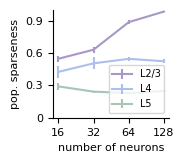

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['legend.title_fontsize'] = config.legend_fontsize
fig, ax = plt.subplots(figsize=(1.5, 1.4))
['#a898c7','#aebfee', '#a6c5b5']
plt.errorbar(x, l23_means_, l23_std_, label='L2/3', c="#a898c7")
plt.errorbar(x, l4_means_, l4_std_, label='L4', c="#aebfee")
plt.errorbar(x, l5_means_, l5_std_, label='L5', c="#a6c5b5")
plt.xscale("log", base=2) # Set log scale for x-axis. Note: basex parameter is deprecated in newer matplotlib versions. Use "base" instead if you encounter an issue.
plt.xticks(x, x, fontsize=config.axis_fontsize) # Set x-ticks at each of your data points, labeling them with their actual values.
plt.ylim(0, 1.0)
plt.yticks([0, 0.3, 0.6, 0.9],[0, 0.3, 0.6, 0.9], fontsize=config.axis_fontsize)
plt.xlabel("number of neurons", fontsize=config.axis_fontsize)
plt.ylabel("pop. sparseness", fontsize=config.axis_fontsize)



plt.legend(fontsize=config.legend_fontsize, title="")
sns.despine()
save_fig=False
if save_fig:
    plt.savefig(f'saved_figs/sparsity_model_hidden_units_smaller.svg', dpi=300)


## Model vs data sparsity

In [9]:
n_hidden = [64]
baseline=False
dynamic_ablation=True
activations = get_activations(exp_args=exp_args, model_name="shallow_mlp", task_name="gabor", ckpt_dir_dict=ckpt_dir_dict, hidden_dim=n_hidden, dynamic_ablation=dynamic_ablation, baseline=baseline)

Dynamic ablation is ON...
args.hidden_dim=64 / args.latent_dim=64
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_1_latent_dim_64_hidden_dim_64.pth
args.hidden_dim=64 / args.latent_dim=64
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_5_latent_dim_64_hidden_dim_64.pth
args.hidden_dim=64 / args.latent_dim=64
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_2_latent_dim_64_hidden_dim_64.pth
args.hidden_dim=64 / args.latent_dim=64
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/gabor/shallow_mlp/fig5/model_seed_3_latent_dim_64_hidden_dim_64.pth
args.hidden_dim=64 / args.latent_dim=64
Ex

In [14]:
activations["False-False"][1].keys()

dict_keys([64])

In [15]:
get_key = lambda i,t : f"{no_input}-{no_topdown}"
n_hidden=n_hidden[0]

no_input = False
no_topdown = False
k = get_key(no_input, no_topdown)
l23s = []
l4s = []
l5s = []
for s in [1,2,3,4,5]:
    l23s.append(TR_measure(activations[k][s][n_hidden]['l23_activations']))
    l4s.append(TR_measure(activations[k][s][n_hidden]['l4_activations']))
    l5s.append(TR_measure(activations[k][s][n_hidden]['l5_activations']))

layers_sparsness = [l23s, l4s, l5s]


no_input = True
no_topdown = False
k = get_key(no_input, no_topdown)
l23s_no_input = []
l4s_no_input = []
l5s_no_input = []
for s in [1,2,3,4,5]:
    l23s_no_input.append(TR_measure(activations[k][s][n_hidden]['l23_activations']))
    l4s_no_input.append(TR_measure(activations[k][s][n_hidden]['l4_activations']))
    l5s_no_input.append(TR_measure(activations[k][s][n_hidden]['l5_activations']))

layers_sparsness_no_input = [l23s_no_input, l4s_no_input, l5s_no_input]




no_input = False
no_topdown = True
k = get_key(no_input, no_topdown)
l23s_no_topdown = []
l4s_no_topdown = []
l5s_no_topdown = []
for s in [1,2,3,4,5]:
    l23s_no_topdown.append(TR_measure(activations[k][s][n_hidden]['l23_activations']))
    l4s_no_topdown.append(TR_measure(activations[k][s][n_hidden]['l4_activations']))
    l5s_no_topdown.append(TR_measure(activations[k][s][n_hidden]['l5_activations']))

layers_sparsness_no_topdown = [l23s_no_topdown, l4s_no_topdown, l5s_no_topdown]



no_input = True
no_topdown = True
k = f"{no_input}-{no_topdown}"
l23s_no_topdown_input = []
l4s_no_topdown_input = []
l5s_no_topdown_input = []
for s in [1,2,3,4,5]:
    l23s_no_topdown_input.append(TR_measure(activations[k][s][n_hidden]['l23_activations']))
    l4s_no_topdown_input.append(TR_measure(activations[k][s][n_hidden]['l4_activations']))
    l5s_no_topdown_input.append(TR_measure(activations[k][s][n_hidden]['l5_activations']))

layers_sparsness_no_topdown_input = [l23s_no_topdown_input, l4s_no_topdown_input, l5s_no_topdown_input]

[0 1 2]


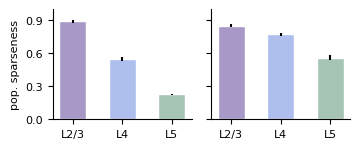

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

save_fig = True

# Define labels, means, and standard deviations for l23 and l5
labels = ['L2/3', 'L4', 'L5']
model_means = [np.mean(l) for l in layers_sparsness]
model_stds = [np.std(l)/np.sqrt(len(l)) for l in layers_sparsness]

data_means = [m[0] for m in experimental_data.values()]
data_stds = [m[1] for m in experimental_data.values()]

x = np.arange(len(labels))  # Adjusted the label locations to start from 0
print(x)
width = 0.55  # the width of the bars
# Colors for each group
colors = ['#a898c7','#aebfee', '#a6c5b5']

fig, ax = plt.subplots(1,2, figsize=(3.7, 1.6), sharey=True)
ax[0].bar(x, model_means, width, yerr=model_stds, color=colors, edgecolor='white')
ax[1].bar(x, data_means, width, yerr=data_stds, color=colors,  edgecolor='white')

# Set xticks first and then labels
for a in ax:
    a.set_xticks(x)
    a.set_xticklabels(labels, fontsize=config.axis_fontsize)
    a.set_ylim(0, 1.0)
    a.set_yticks([0.0, 0.3, 0.6, 0.9])
    a.set_yticklabels([0.0, 0.3, 0.6, 0.9], fontsize=config.axis_fontsize)
    
    
# ax[0].set_title("Model", fontsize=config.title_fontsize)
# ax[1].set_title("Data", fontsize=config.title_fontsize)

ax[0].set_ylabel('pop. sparseness', fontsize=config.axis_fontsize)

sns.despine()
fig.tight_layout()

if save_fig:
    plt.savefig(f'saved_figs/sparsity_model_data_baseline_{baseline}.svg', dpi=300)
else:
    print('not saving fig')

## sparsity after dynamic k.o.

[0 1 2]
not saving fig


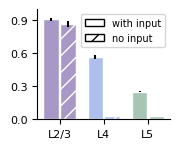

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np



offset_bar = 0.02
# Define labels, means, and standard deviations for l23 and l5
labels = ['L2/3', 'L4', 'L5']
model_means = [np.mean(l)+offset_bar for l in layers_sparsness]
model_stds = [np.std(l)/np.sqrt(len(l)) for l in layers_sparsness]

model_means_no_input = [np.mean(l)+offset_bar for l in layers_sparsness_no_input]
model_stds_no_input = [np.std(l)/np.sqrt(len(l)) for l in layers_sparsness_no_input]

model_means_no_topdown = [np.mean(l)+offset_bar for l in layers_sparsness_no_topdown]
model_stds_no_topdown = [np.std(l)/np.sqrt(len(l)) for l in layers_sparsness_no_topdown]

model_means_no_topdown_input = [np.mean(l)+offset_bar for l in layers_sparsness_no_topdown_input]
model_stds_no_topdown_input = [np.std(l)/np.sqrt(len(l)) for l in layers_sparsness_no_topdown_input]


x = np.arange(len(labels))  # Adjusted the label locations to start from 0
print(x)
width = 0.35  # the width of the bars
# Colors for each group
colors = ['#a898c7','#aebfee', '#a6c5b5']

fig, ax = plt.subplots(1,1, figsize=(1.9, 1.6))
for i, label in enumerate(labels):
    offset = 0.9*width
    # ax[0].bar(x[i], model_means[i], width, yerr=model_stds[i],  color=colors[i], edgecolor='white')
    # ax[1].bar(x[i], model_means_no_input[i], width, yerr=model_stds_no_input[i], color=colors[i], edgecolor='white')
    ax.bar(x[i]- 0.6 * offset, model_means[i], width, yerr=model_stds[i],  color=colors[i], edgecolor='white')
    ax.bar(x[i]+ 0.6 * offset, model_means_no_input[i], width, yerr=model_stds_no_input[i], color=colors[i], hatch="//", edgecolor='white')
    # ax.bar(x[i] + .5 * offset, model_means_no_topdown[i], width, yerr=model_stds_no_topdown[i], color=colors[i], hatch='X', edgecolor='white')
    # ax.bar(x[i] + 1.5 * offset, model_means_no_topdown_input[i], width, yerr=model_stds_no_topdown_input[i], color=colors[i], hatch='-', edgecolor='white')
    
# Set xticks first and then labels
# for i, a in enumerate(ax):
#     a.set_xticks(x)
#     a.set_xticklabels(labels, fontsize=config.axis_fontsize)
#     a.set_ylim(0, 1.)
#     a.set_yticks([0.0, 0.3, 0.6, 0.9])
#     a.set_yticklabels([0.0, 0.3, 0.6, 0.9], fontsize=config.axis_fontsize)


    
# ax.set_title("Model (full + dynamic KOs)", fontsize=config.title_fontsize)
    # if i ==0:
    #     a.set_ylabel('Population sparseness', fontsize=config.axis_fontsize)

# ax[0].set_title("with input", fontsize=config.axis_fontsize)
# ax[1].set_title("no input", fontsize=config.axis_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=config.axis_fontsize)
ax.set_ylim(0, 1.0)
ax.set_yticks([0.0, 0.3, 0.6, 0.9])
ax.set_yticklabels([0.0, 0.3, 0.6, 0.9], fontsize=config.axis_fontsize)

full_patch = mpatches.Patch(facecolor='white', label='with input', edgecolor='black')
no_input_patch = mpatches.Patch(facecolor='white', hatch="//", label='no input', edgecolor='black')
# no_topdown_patch = mpatches.Patch(facecolor='white', hatch="X", label='no top-down', edgecolor='black')
# no_input_topdown_patch = mpatches.Patch(facecolor='white', hatch="-", label='no input & no top-down', edgecolor='black')

ax.legend(handles=[full_patch, no_input_patch], fontsize=config.legend_fontsize)
ax.legend(handles=[full_patch, no_input_patch], fontsize=config.legend_fontsize)
sns.despine()

fig.tight_layout()

save_fig = False
if save_fig:
    plt.savefig(f'saved_figs/sparsity_model_dynamic_ablation_{baseline}.svg', dpi=300)
else:
    print('not saving fig')

## sparsity with model ablation

In [20]:
exp_args = load_exp_args(checkpoint_dir="../checkpoints/gabor/shallow_mlp/fig3/args")
ckpt_dir_dict = {"exp_name": 'fig3', "suffix_args": ['seed','ablate_thal_l5','ablate_delay','ablate_topdown','ablate_l23_l5'], "sub_dir": ""}

In [21]:
ablations = ['ablate_delay', 'ablate_l23_l5', 'ablate_thal_l5','ablate_topdown', 'full']
activations_all = {}
n_hidden=[64]
for ablation in ablations:
    args = []
    if ablation == 'full':
        full_args = [arg for arg in exp_args if arg.ablate_delay == False and arg.ablate_l23_l5 == False and arg.ablate_thal_l5 == False and arg.ablate_topdown == False]
        args.extend(full_args)
    else:
        for arg in exp_args:
            if eval(f'arg.{ablation}') == True:
                args.append(arg)
    print(args)
    if len(args) > 0:
        print(f'\n Ablation: {ablation}\n')
        activations = get_activations(exp_args=args, model_name="shallow_mlp", task_name="gabor", ckpt_dir_dict=ckpt_dir_dict, hidden_dim=n_hidden)
        activations_all[ablation]= activations
        
# plot_ablation_summary(predictions_all, name=f'fig3_summary_ablations.svg', save_fig=True)

[Namespace(seed=1, input_dim=784, hidden_dim=64, latent_dim=64, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=True, ablate_topdown=False, ablate_l23_l5=False), Namespace(seed=3, input_dim=784, hidden_dim=64, latent_dim=64, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=True, ablate_topdown=False, ablate_l23_l5=False), Namespace(seed=5, input_dim=784, hidden_dim=64, latent_dim=64, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode

In [22]:
activations_all['ablate_delay']["False-False"].keys()

dict_keys([1, 3, 5, 2, 4])

In [23]:
activations_all['ablate_delay']['False-False']

results = {}
for ablation in ablations:
    if ablation not in results:
        results[ablation] = {'l23': [], 'l4': [], 'l5': []}
    condition = 'False-False'
    # for seed in [1,2,3,4,5]:
    for seed in [1,2]:
        
        
        n_hidden = 64
        l23_ = TR_measure(activations_all[ablation][condition][seed][n_hidden]['l23_activations'])
        l4_ = TR_measure(activations_all[ablation][condition][seed][n_hidden]['l4_activations'])
        l5_ = TR_measure(activations_all[ablation][condition][seed][n_hidden]['l5_activations'])
        
        results[ablation]['l23'].append(l23_)
        results[ablation]['l4'].append(l4_)
        results[ablation]['l5'].append(l5_)
        

In [24]:
results

{'ablate_delay': {'l23': [0.048956061645639176, 0.05019678886548325],
  'l4': [0.11760544643246762, 0.1195343157546561],
  'l5': [0.1458480049982201, 0.13943923552858256]},
 'ablate_l23_l5': {'l23': [0.023787210257627193, 0.019395826790533522],
  'l4': [0.01918897485656634, 0.02120448800342016],
  'l5': [0.1322745086982301, 0.1232023630822484]},
 'ablate_thal_l5': {'l23': [0.7789542860039109, 0.7398348949348212],
  'l4': [0.4261724686214608, 0.5214033641531264],
  'l5': [1.4821619909555405e-08, 7.065126624476261e-10]},
 'ablate_topdown': {'l23': [0.9187815570237363, 0.9157601132215314],
  'l4': [0.5072020865608633, 0.635648900369929],
  'l5': [0.23516780505634244, 0.21098596475821244]},
 'full': {'l23': [0.8779689930481968, 0.9312095379825064],
  'l4': [0.5007315957453196, 0.6077536764857444],
  'l5': [0.22805822784183089, 0.20911651929999805]}}

not saving fig


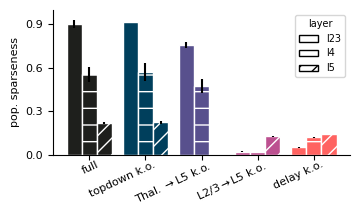

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Define labels, means, and standard deviations for l23 and l5

labels = list(results.keys())
labels.reverse()
labels

l23_means = [np.mean(results[ablation]['l23']) for ablation in labels]
l5_means = [np.mean(results[ablation]['l5']) for ablation in labels]
l4_means = [np.mean(results[ablation]['l4']) for ablation in labels]

l23_stds = [np.std(results[ablation]['l23']) for ablation in labels]
l5_stds = [np.std(results[ablation]['l5']) for ablation in labels]
l4_stds = [np.std(results[ablation]['l4']) for ablation in labels]


x = np.arange(len(labels))  # the label locations
width = 0.27  # the width of the bars

# Colors for each group
colors = ['#1e1f1c','#003f5c', '#58508d', '#bc5090', '#ff6361']


fig, ax = plt.subplots(figsize=(3.7, 2.25))
for i, label in enumerate(labels):
    ax.bar(x[i] - width, l23_means[i], width, yerr=l23_stds[i], label=f'L23 {label}', color=colors[i], edgecolor='white')
    ax.bar(x[i], l4_means[i], width, yerr=l4_stds[i], label=f'L4 {label}', color=colors[i], hatch='-', edgecolor='white')
    ax.bar(x[i] + width, l5_means[i], width, yerr=l5_stds[i], label=f'L5 {label}', color=colors[i], hatch='//', edgecolor='white')
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('pop. sparseness', fontsize=config.axis_fontsize)
# ax.set_title('$x_2$ classification accuarcy',fontsize=config.title_fontsize) 
ax.set_xticks(x, fontsize=config.axis_fontsize)
ax.set_ylim(0, 1.0)
ax.set_yticks([0.0, 0.3, 0.6, 0.9])
ax.set_yticklabels([0.0, 0.3, 0.6, 0.9], fontsize=config.axis_fontsize)

ax.set_xticklabels(['full', 'topdown k.o.', r'Thal. $\rightarrow$L5 k.o.', r'L2/3$\rightarrow$L5 k.o.', 'delay k.o.'], rotation=25, ha="right", fontsize=config.axis_fontsize)


# Create offset transform by 5 points in x direction
import matplotlib
dx = 8/72.; dy = +0.05
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)



sns.despine()
# add custom legend
l23_patch = mpatches.Patch(facecolor='white', label='l23', edgecolor='black')
l4_patch = mpatches.Patch(facecolor='white', hatch="-", label='l4', edgecolor='black')
l5_patch = mpatches.Patch(facecolor='white', hatch="//", label='l5', edgecolor='black')
ax.legend(handles=[l23_patch,l4_patch, l5_patch], title="layer", fontsize=config.legend_fontsize)


fig.tight_layout()

save_fig = False
if save_fig:
    plt.savefig(f'saved_figs/sparsity_model_ablation.svg', dpi=300)
else:
    print('not saving fig')
